In [1]:
#modules importing start
import pandas as pd
import numpy as np
import gmplot

#modules in use for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.basemap import Basemap
from matplotlib import cm

#modules in use for animation
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

%matplotlib inline
#modules importing end

In [2]:
df_apr14=pd.read_csv("uber-raw-data-apr14.csv")
df_may14=pd.read_csv("uber-raw-data-may14.csv")
df_jun14=pd.read_csv("uber-raw-data-jun14.csv")
df_jul14=pd.read_csv("uber-raw-data-jul14.csv")
df_aug14=pd.read_csv("uber-raw-data-aug14.csv")
df_sep14=pd.read_csv("uber-raw-data-sep14.csv")

df = df_apr14.append([df_may14,df_jun14,df_jul14,df_aug14,df_sep14], ignore_index=True) #merging in single dataframe

C:\Users\sanjo\AppData\Local\Temp\ipykernel_13492\77383606.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_apr14.append([df_may14,df_jun14,df_jul14,df_aug14,df_sep14], ignore_index=True) #merging in single dataframe


In [3]:
df = df.rename(columns={'Date/Time': 'Date_time'})
df['Date_time'] = pd.to_datetime(df['Date_time']) #converting the Date/Time from object type to pandas datetime64
#using pandas.Series.dt functions to get month,weekday,day,hour and minute
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [4]:
def count_rows(rows):
    return len(rows)

#grouping the data according to hour and day
df_hour_day = df.groupby('Hour Day'.split()).apply(count_rows).unstack()

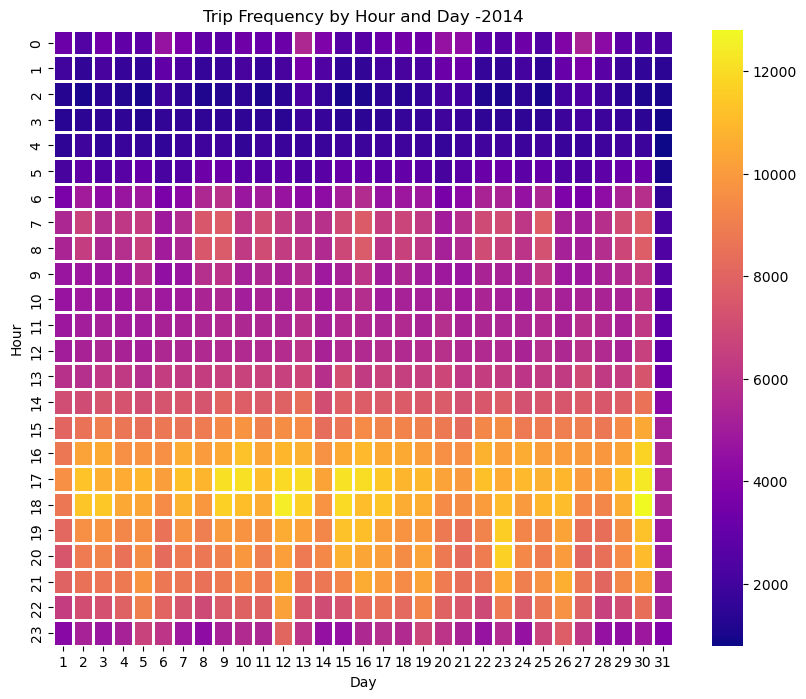

In [10]:
#plotting the heatmap for trips according to Hour-Day
plt.figure(figsize = (10,8)) 
hdHeatmap = sns.heatmap(df_hour_day, cmap=cm.plasma, linewidth = .8) #Using the seaborn heatmap function to plot frequency
hdHeatmap.set(title="Trip Frequency by Hour and Day -2014");

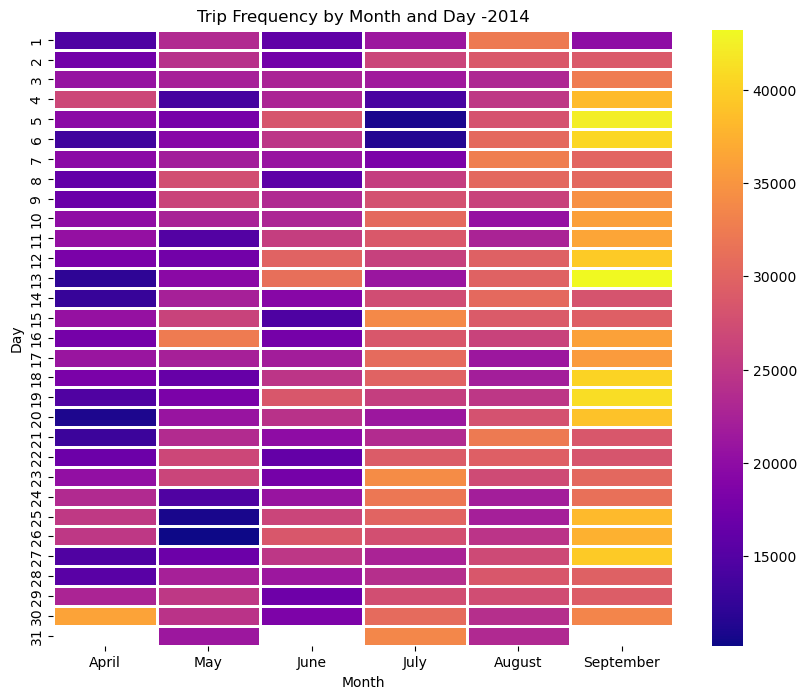

In [11]:
#grouping the data according to month and day
df_day_month = df.groupby('Day Month'.split(), sort = False).apply(count_rows).unstack()
#plotting the heatmap for trips according to Month-Day
plt.figure(figsize = (10,8))
mdHeatmap = sns.heatmap(df_day_month, cmap = cm.plasma, linewidth = .8)
mdHeatmap.set(title="Trip Frequency by Month and Day -2014");

In [7]:
#Setting up the limits for latitude and longitude
top, bottom, left, right = 41, 40.55, -74.3, -73.6
#dropping duplicates to reduce size
# df_new = df.drop_duplicates(['Lat','Lon'])
# Longitudes = df_new['Lon']
# Latitudes = df_new['Lat']
Latitudes = df['Lat']
Longitudes = df['Lon']

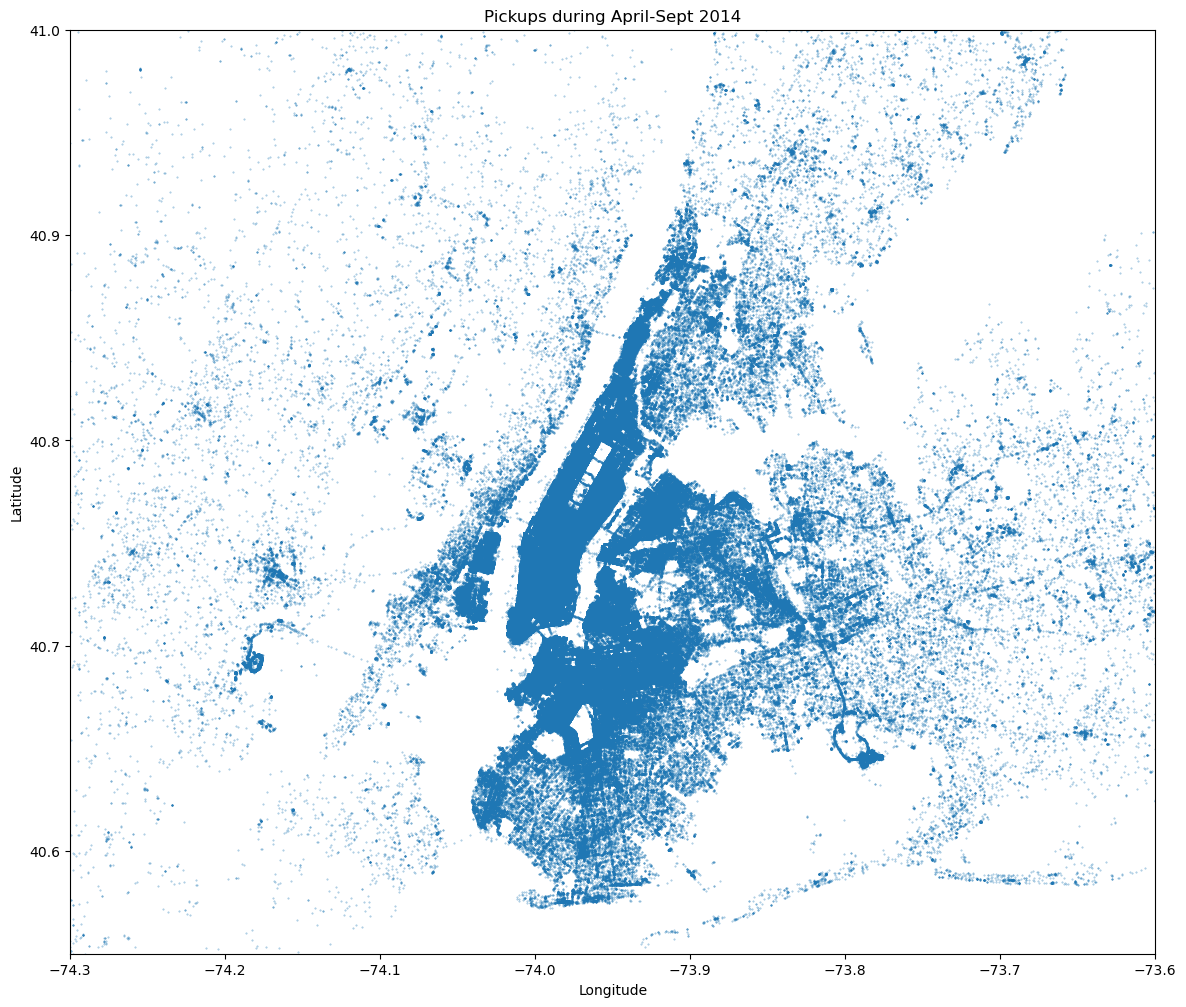

In [12]:
%matplotlib inline

plt.figure(figsize=(14, 12))

plt.plot(Longitudes, Latitudes, '.', ms=.8, alpha=.5)

plt.ylim(top=top, bottom=bottom)
plt.xlim(left=left, right=right)

 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickups during April-Sept 2014')

plt.show()

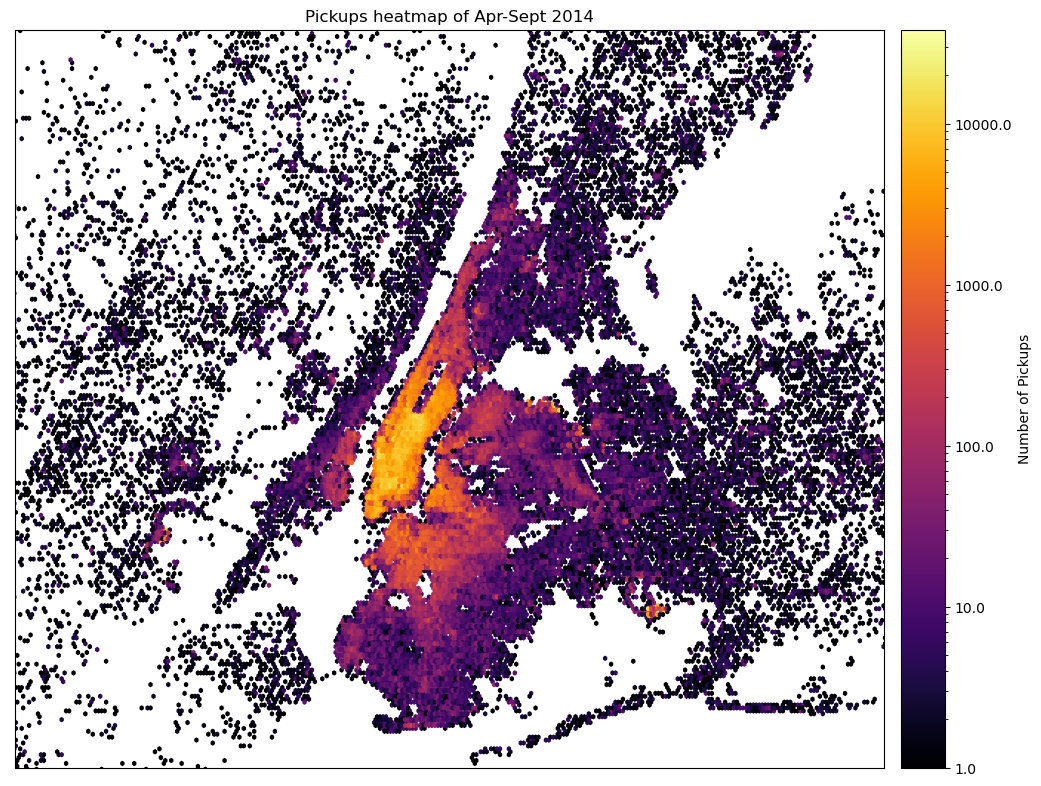

In [9]:
plt.figure(figsize=(12, 10))
plt.title('Pickups heatmap of Apr-Sept 2014')
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1200, bins='log', cmap=cm.inferno)
map.colorbar(location='right', format='%.1f', label='Number of Pickups');